<h1><center>Python For Machine Learning: A Beginner's Workshop</center></h1>
<h2><center>Chapter 4</center></h2>
<h2><center>Learning Scikit Learn: The Machine Learning Python tool</center></h2>
<h2><center>UE19EC353:  Machine Learning</center></h2>
<h2><center>Jan - May 2022</center></h2>

##### This Jupyter notebook is a part of the workshop held for introducing Python for Machine Learning. It is a part of the course UE19EC353:  Machine Learning for the Jan-May 2022 session for students of the 6th sem of the ECE Dept of PES University (RR and EC Campus)

## 4.1 Scikit Learn, what exactly is it?

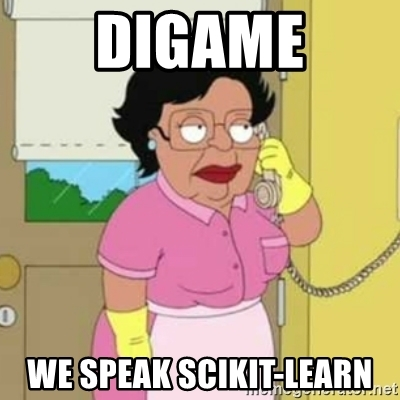

Scikit Learn is a widely used open source ML python library for predictive analysis. Scikit learn provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.
Scikit Learn is built on Numpy, Scipy and Matplotlib.

The major capabilities of scikit learn include:
- Classification
- Regression
- Clustering
- Dimensionality Reduction
- Model Selection
and much more ...

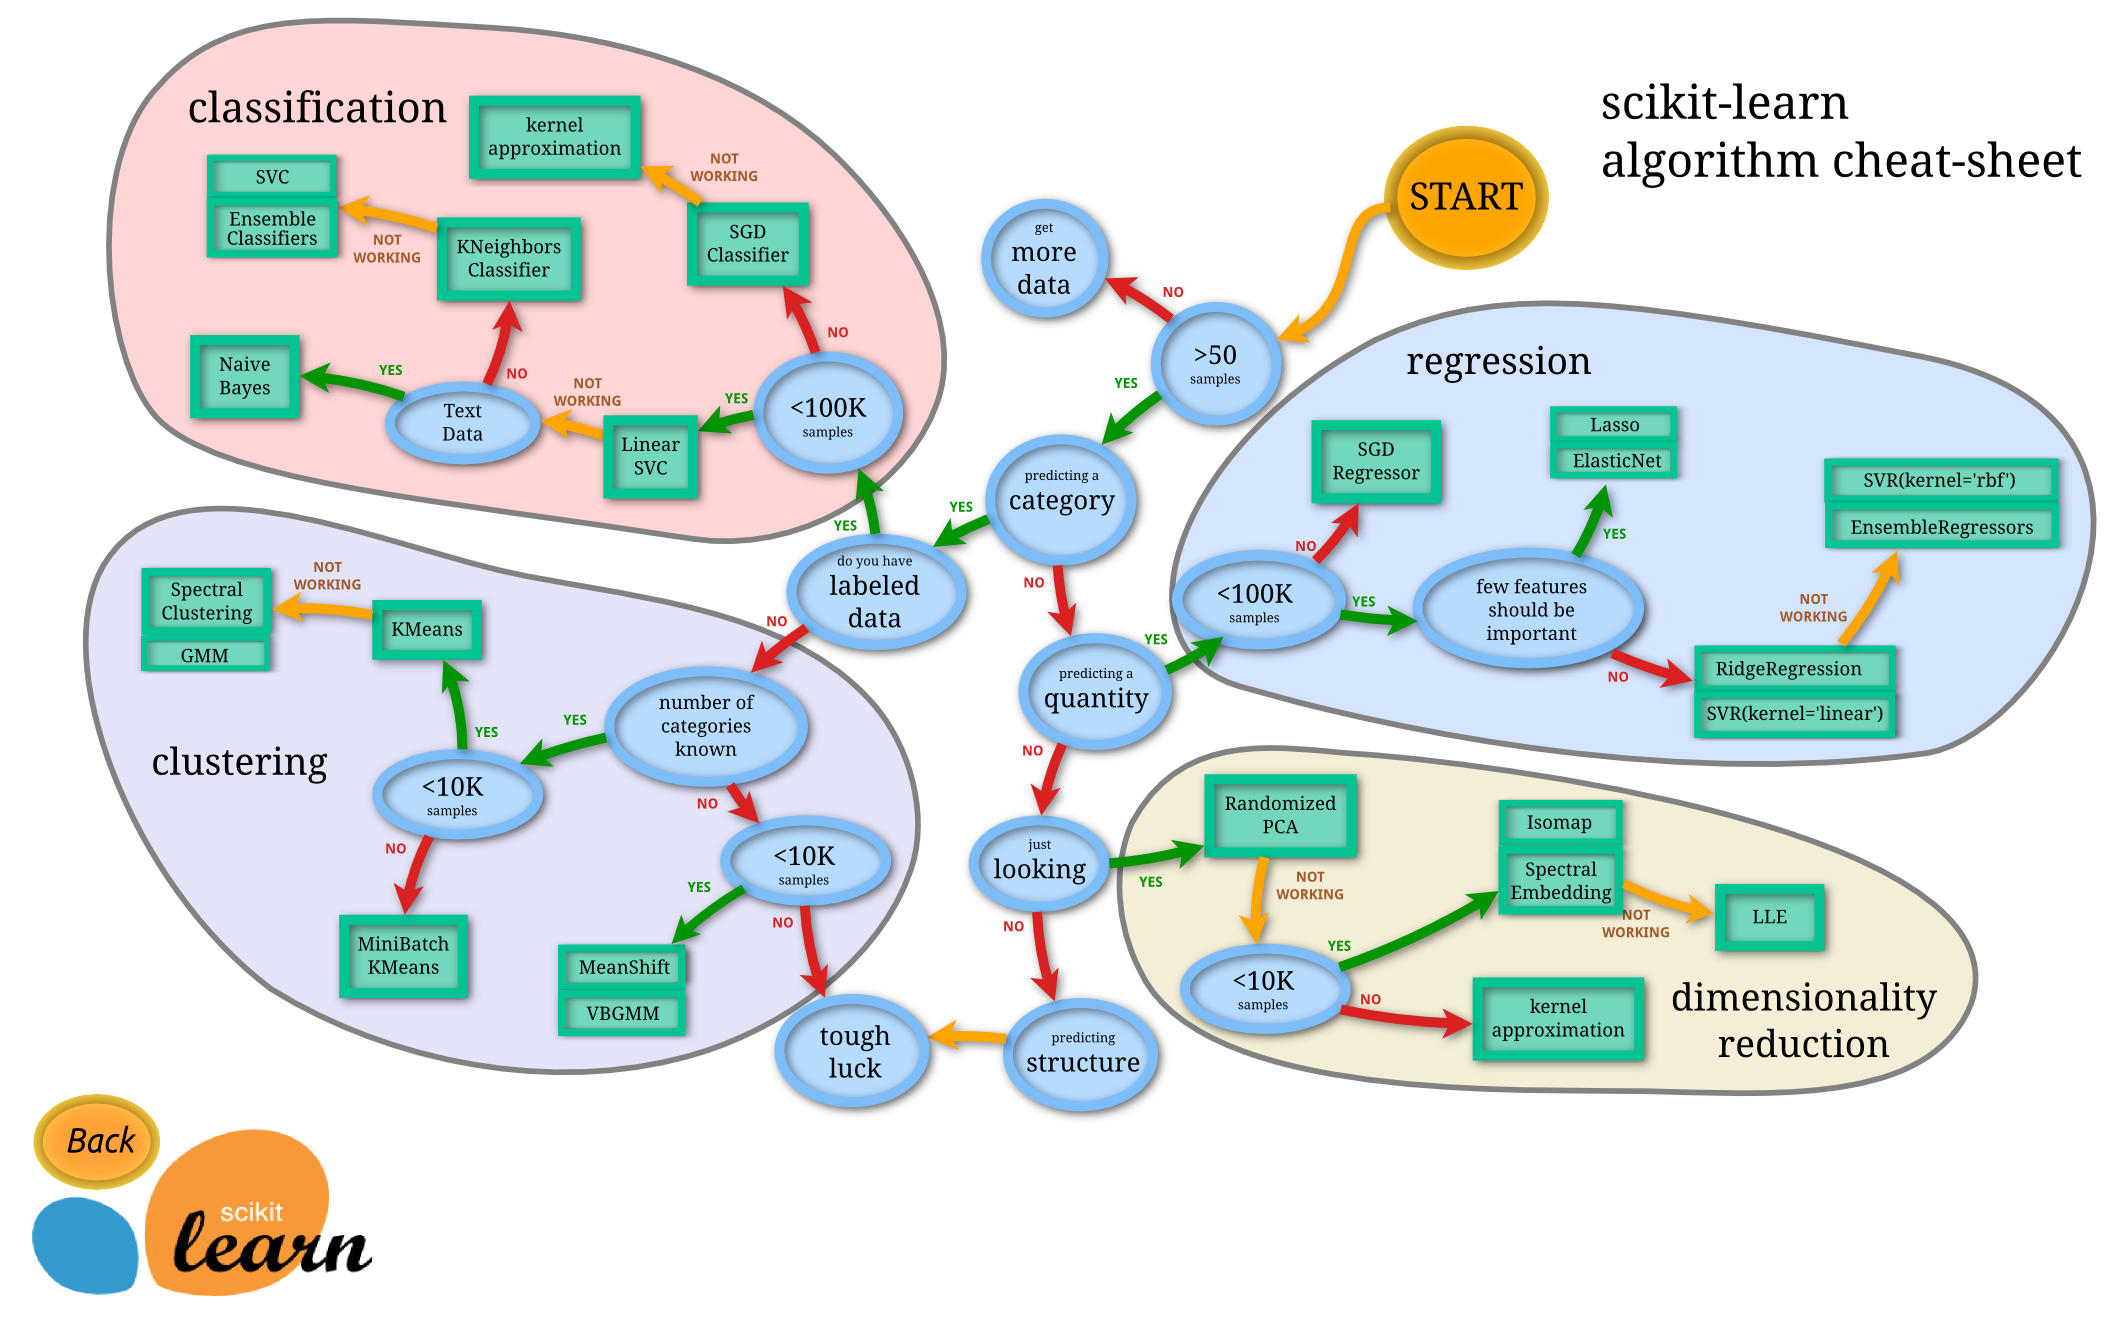

## 3.2 Installing scikit learn

It is always :

$ pip install scikit-learn

## 3.3 Starting off with iris dataset

### 3.3.1 What is Iris dataset?

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.



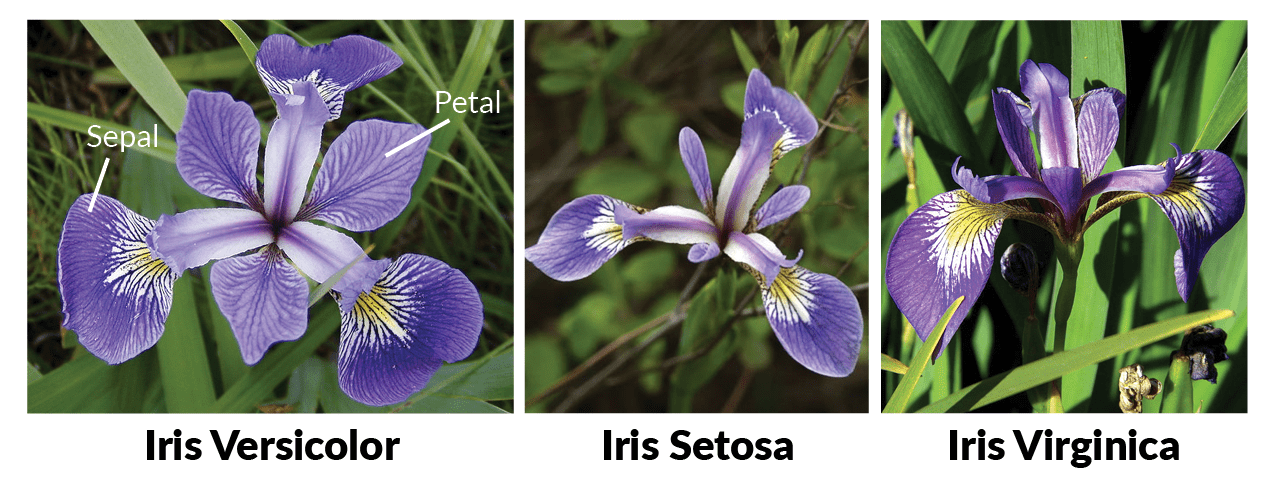

### 3.3.2 Classification using KNN classifier

Wait Wait...
What is KNN classifier?

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.

In [11]:
from sklearn import neighbors, datasets, preprocessing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import accuracy_score

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


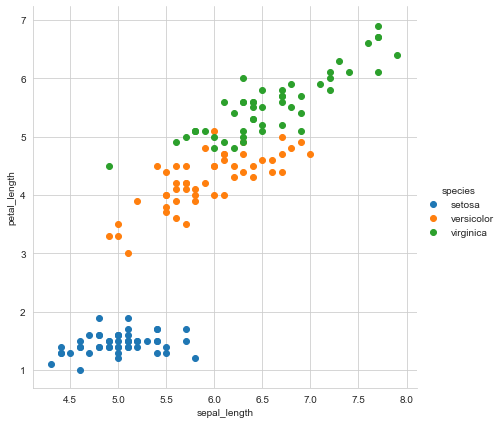

In [10]:
#Lets visualize iris first
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
 
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

In [41]:
# loading data
iris = datasets.load_iris()

X, y = iris['data'], iris['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=33)

In [46]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [47]:
X_train = scaler.transform(X_train)

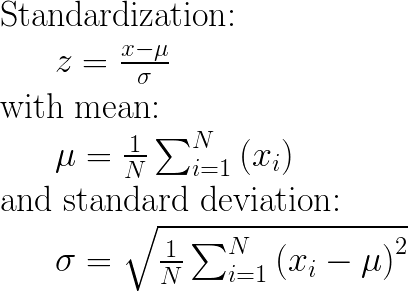

In [49]:
X_test = scaler.transform(X_test)

In [54]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = knn.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.8947368421052632

### 3.3.3 Improving using cross validation

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [63]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

Accuracy: 0.97 (+/- 0.01)


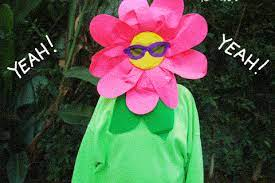

## 3.4 Classification

### 3.4.1 Support Vector Machines

Support vector machines is a family of algorithms attempting to pass a (possibly high-dimension)
hyperplane between two labelled sets of points, such that the distance of the points from the plane
is optimal in some sense. SVMs can be used for classification or regression (corresponding to
sklearn.svm.SVC and sklearn.svm.SVR, respectively

In [64]:
# Lets create some classification data
import numpy as np

In [72]:
x0, x1 = np.random.randn(10, 2), np.random.randn(10, 2) + (1, 1)

In [73]:
x = np.vstack((x0, x1))
y = [0] * 10 + [1] * 10

In [74]:
y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [75]:
x.shape

(20, 2)

In [76]:
x

array([[-0.96182402, -0.2534448 ],
       [ 0.77650582,  0.7882748 ],
       [-1.00044149, -2.39985055],
       [-0.56069177,  0.53957979],
       [ 0.05301135, -0.85518352],
       [-0.66098762, -0.85144335],
       [ 0.31064902, -0.93720505],
       [-1.50052513,  0.70159042],
       [-0.05667507, -1.41724598],
       [ 0.86907509, -0.35048466],
       [ 1.38023535,  1.6887984 ],
       [-0.31611794,  0.19542464],
       [ 2.24784375,  0.94242925],
       [ 1.60428676,  0.42722282],
       [ 1.31457088, -0.15689866],
       [ 1.55431568,  1.48410168],
       [ 0.53783257,  1.08233756],
       [ 0.81115517, -0.80063737],
       [ 2.06580716,  0.70851009],
       [ 1.86246318,  1.25912075]])

In [77]:
from sklearn import svm
svm.SVC(kernel='linear').fit(x, y)

SVC(kernel='linear')

In [78]:
 svm.SVC(kernel='linear').fit(x, y).predict([[0, 0]])


array([0])

In [79]:
svm.SVR(kernel='linear').fit(x, y)

SVR(kernel='linear')

### 3.4.2 Naive bayes classifier

Naive Bayes is a classification technique. It is based on the Bayes algortihm.

This algorithm works by calculating the probabilities of each factor and then using argmax to select the outcome with highest probability.

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.9473684210526315

### 3.4.3 Decision Tree classifier

A decision tree classifier creates the classification model by using a decision tree.The Decesion tree can perform both classification and regression.
The decision tree uses a sequence of verbose rules given yes or no.

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 3.]])

array([1])

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)
clf = DecisionTreeClassifier(max_depth = 3,random_state = 0)
clf.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(348.75, 792.75, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(232.5, 566.25, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(465.0, 566.25, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(232.5, 339.75, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(116.25, 113.25, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(348.75, 113.25, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(697.5, 339.75, 'petal length (cm) <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(581.25, 113.25, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(813.75, 113.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = virginica')]

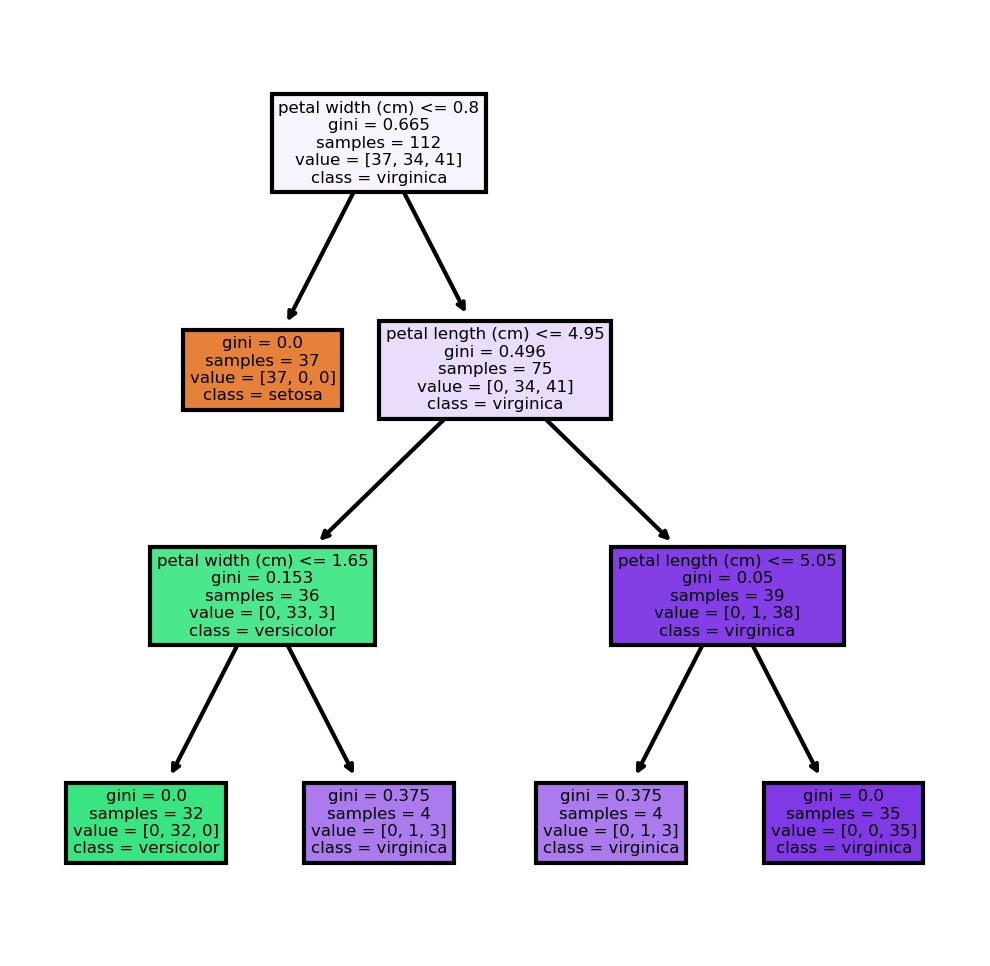

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)

### 3.4.4 Multiple decisoin trees: Random Forest 

Random forest is an ensemble method which is often seen as a bagging method.The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

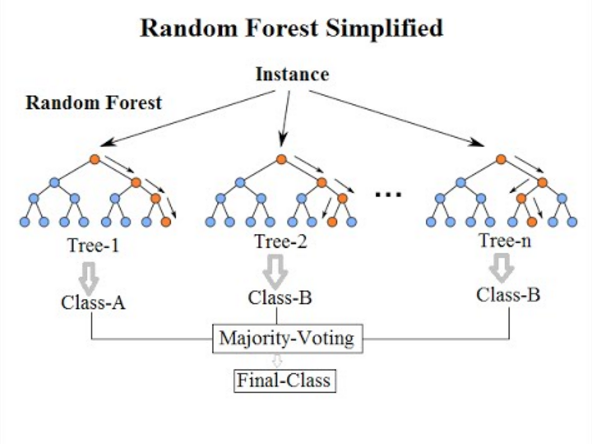

In [20]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0,0], [1, 1,1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)
pred = clf.predict([[2., 3.,2.]])
print(pred)

[1]


## 3.5 Jumping into Unsupervised Learning

Unlike supervised learning, unsupervised learning is a method where there is no teacher, i.e labeled input features and targets.


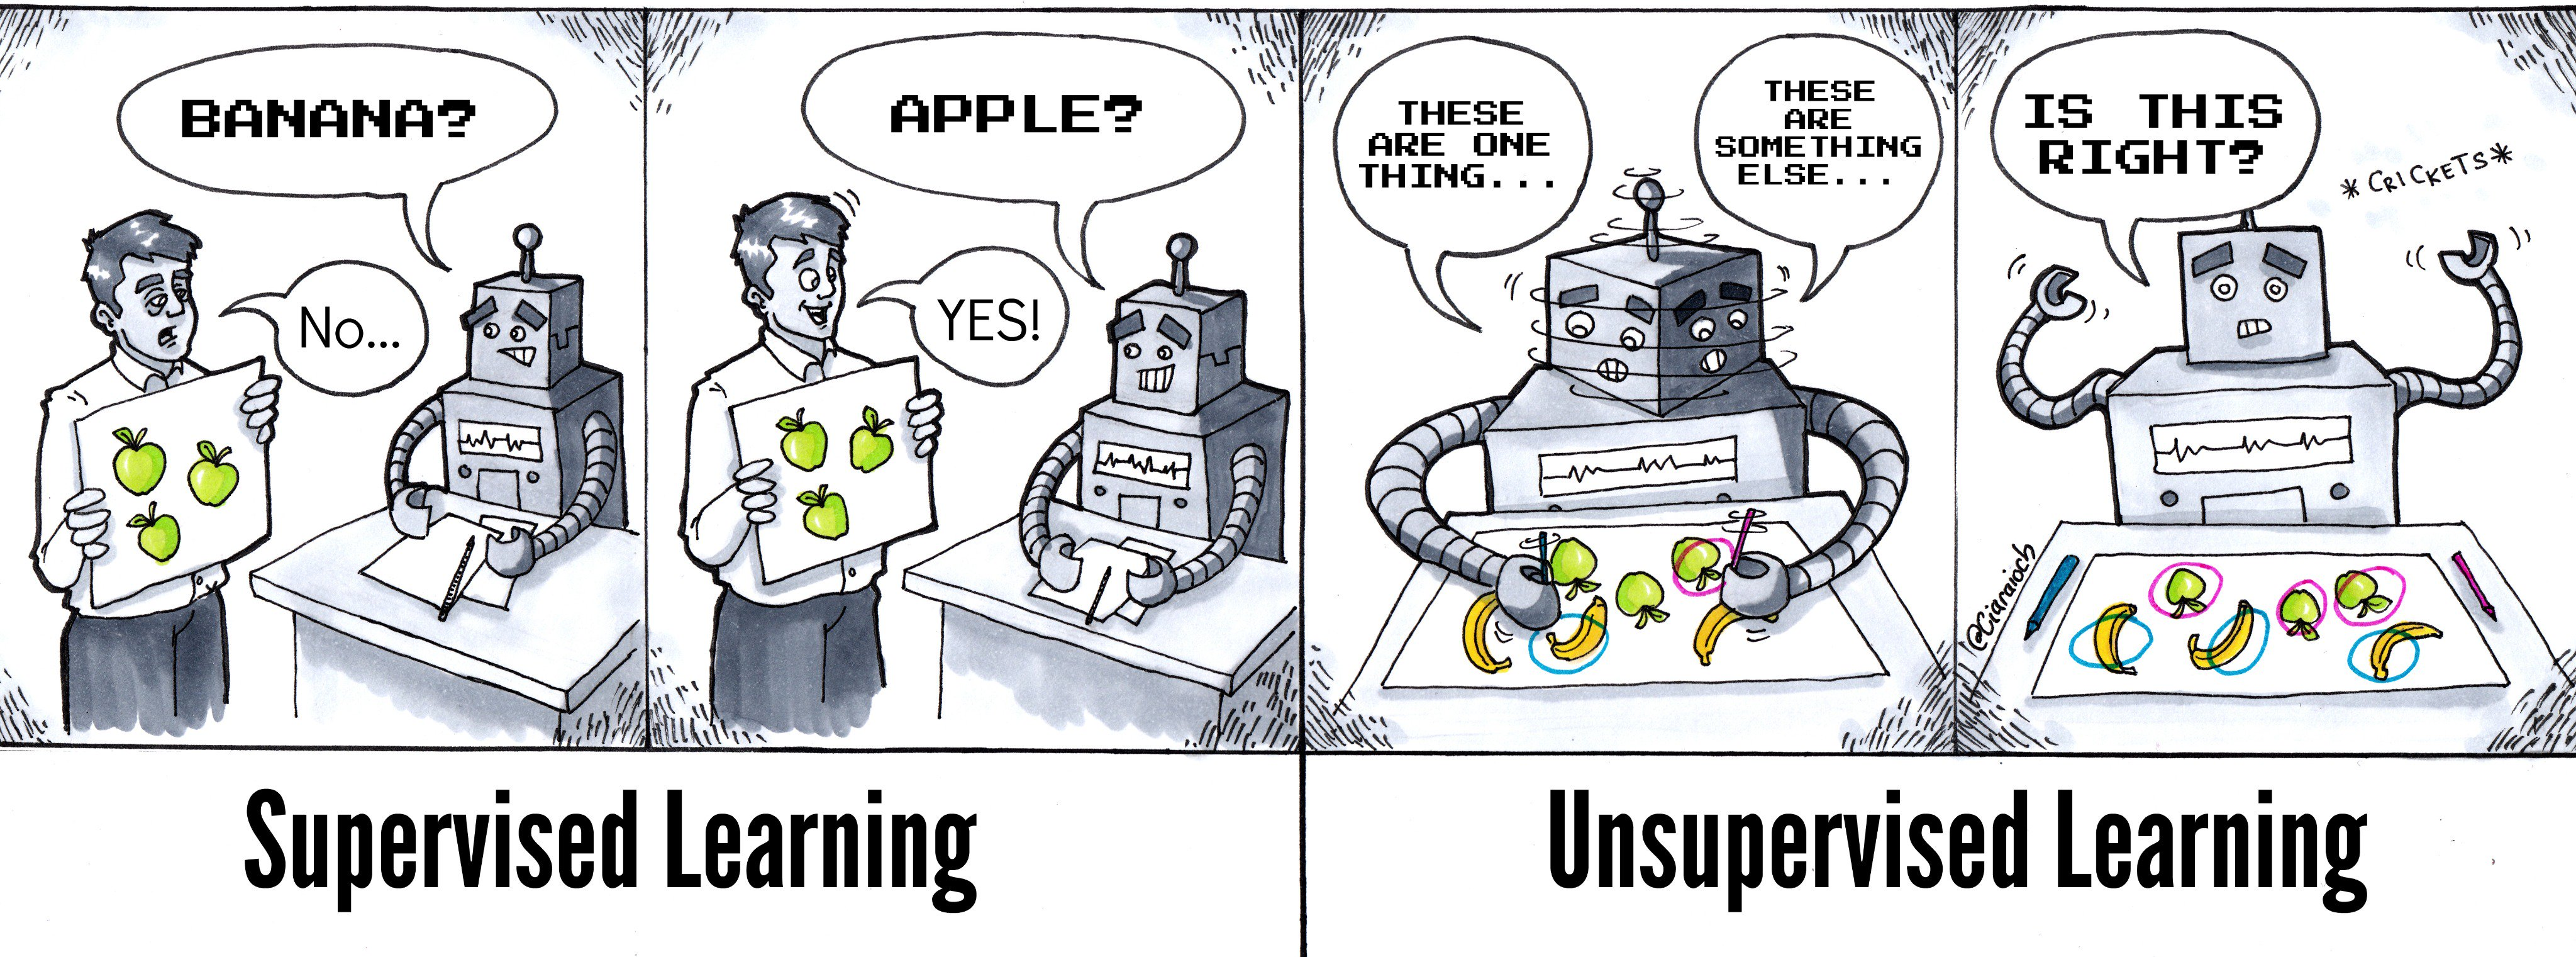

Scikit Learn comes with inbuilt unsupervised learning package. Some important ones include:
- Clustering
- Principal Component Analysis(PCA)

### 3.5.1 K Means Clustering

The main idea about clustering is to divide data points into K clusters. Each of these cluster has a specific centroid. The ideology of these clusters would consist of data similar to each other.

In every step, each data is placed closest to a certain centroid, thus making them belong to a certain data class.

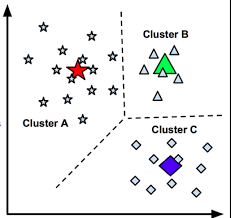

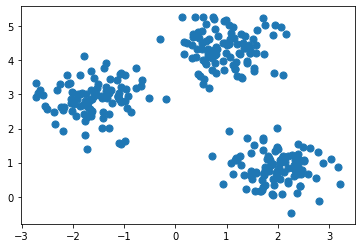

In [36]:
# Making blobs of data
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(
   n_samples=300, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)
plt.scatter(
   X[:, 0], X[:, 1],
   s=50
)
plt.show()

In [37]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=1000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

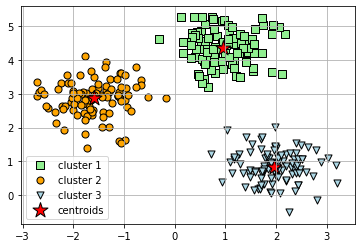

In [38]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)



# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### 3.5.2 Principal Component Analysis (PCA)

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set.This is done by transforming the variables to a new set of variables, which are known as the principal components and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [4]:
data["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df1=pd.DataFrame(data['data'],columns=data['feature_names'])
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
scaling=StandardScaler()

In [7]:
scaling.fit(df1)
Scaled_data=scaling.transform(df1)

In [8]:
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [9]:
x.shape

(569, 3)

In [10]:
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970608, -0.21518136, -0.2310767 ,  0.18611303,
         0.1518916 ,  0.06016539, -0.0347675 ,  0.19034878,  0.36657548,
        -0.10555216,  0.08997968, -0.08945725, -0.15229262,  0.20443045,
         0.23271588,  0.19720731,  0.13032152,  0.183848  ,  0.28009204,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935185,  0.17230435,
         0.14359316,  0.09796413, -0.00825726,  0.14188334,  0.27533946],
       [-0.0085314 ,  0.06454979, -0.00931438,  0.02869921, -0.10429218,
        -0.07409143,  0.00273316, -0.02556362, -0

Text(0, 0.5, 'pc2')

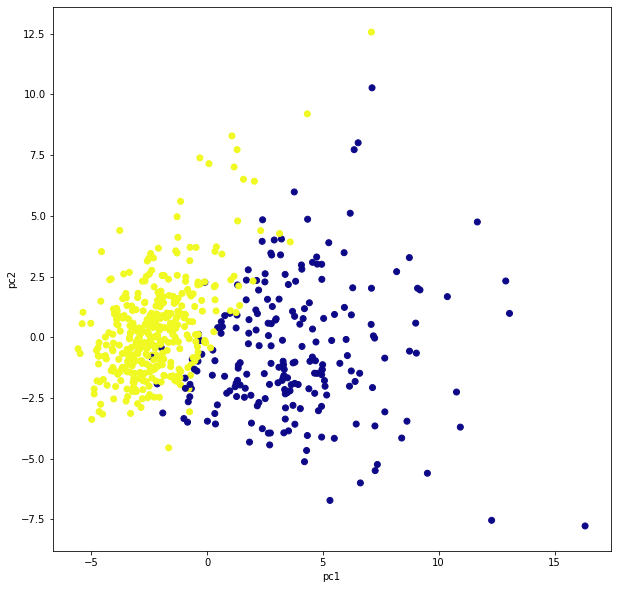

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

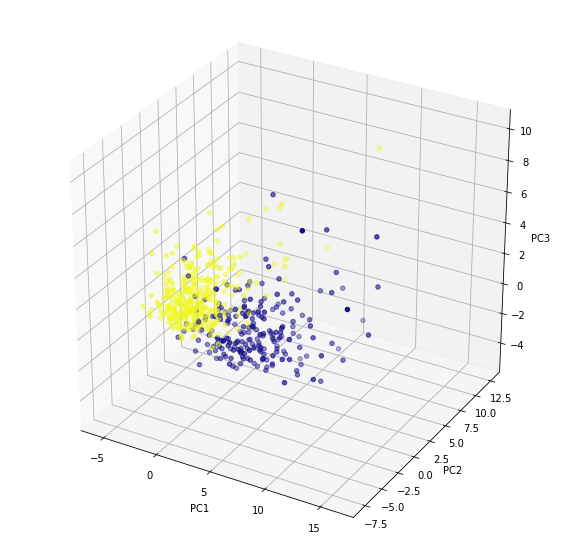

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

## 3.6 Regression

In [15]:
dataset = pd.read_csv('C:\\Users\\venka\\Desktop\\TAMachineLearning\\Workshops\\Files\\student_scores.csv')

In [16]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


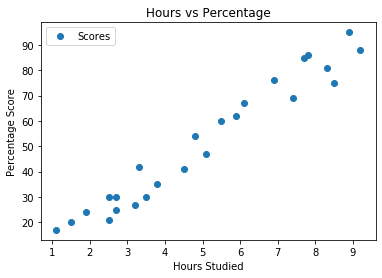

In [17]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


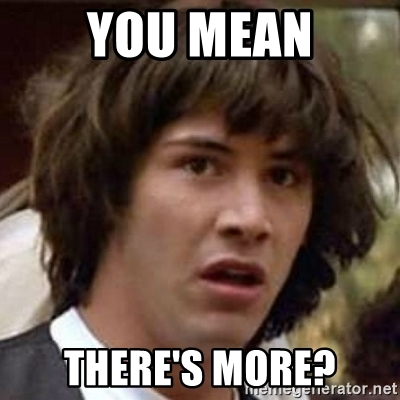

##### Pls mail to venkatramnank@pesu.pes.edu for doubts and if you encounter any problems regarding this notebook!!